## Q-4

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from google.colab.patches import cv2_imshow
from scipy import signal

In [ ]:
gauss_filter = np.array([
[0.002969,     0.013306,     0.021938,     0.013306,     0.002969],
[0.013306,     0.059634,      0.09832,     0.059634,     0.013306],
[0.021938,      0.09832,       0.1621,      0.09832,     0.021938],
[0.013306,     0.059634,      0.09832,     0.059634,     0.013306],
[0.002969,     0.013306,     0.021938,     0.013306,     0.002969]
                 ])

In [ ]:
image = np.zeros((100,100), dtype=np.float32)
image[100//2, 100//2] = 1




[[0.002969 0.013306 0.021938]
 [0.013306 0.059634 0.09832 ]
 [0.021938 0.09832  0.1621  ]]


In [ ]:
def convolution(image: np.ndarray, kernel: list | tuple) -> np.ndarray:
    if len(image.shape) == 3:
        m_i, n_i, c_i = image.shape

    # if the image is gray then we won't be having an extra channel so handling it
    elif len(image.shape) == 2:
        image = image[..., np.newaxis]
        m_i, n_i, c_i = image.shape
    else:
        raise Exception('Shape of image not supported')

    m_k, n_k = kernel.shape

    y_strides = m_i - m_k + 1  # possible number of strides in y direction
    x_strides = n_i - n_k + 1  # possible number of strides in x direction

    img = image.copy()
    output_shape = (m_i-m_k+1, n_i-n_k+1, c_i)
    output = np.zeros(output_shape, dtype=np.float32)

    count = 0  # taking count of the convolution operation being happening

    output_tmp = output.reshape(
        (output_shape[0]*output_shape[1], output_shape[2])
    )

    for i in range(y_strides):
        for j in range(x_strides):
            for c in range(c_i): # looping over the all channels
                sub_matrix = img[i:i+m_k, j:j+n_k, c]

                output_tmp[count, c] = np.sum(sub_matrix * kernel)

            count += 1

    output = output_tmp.reshape(output_shape)

    return output

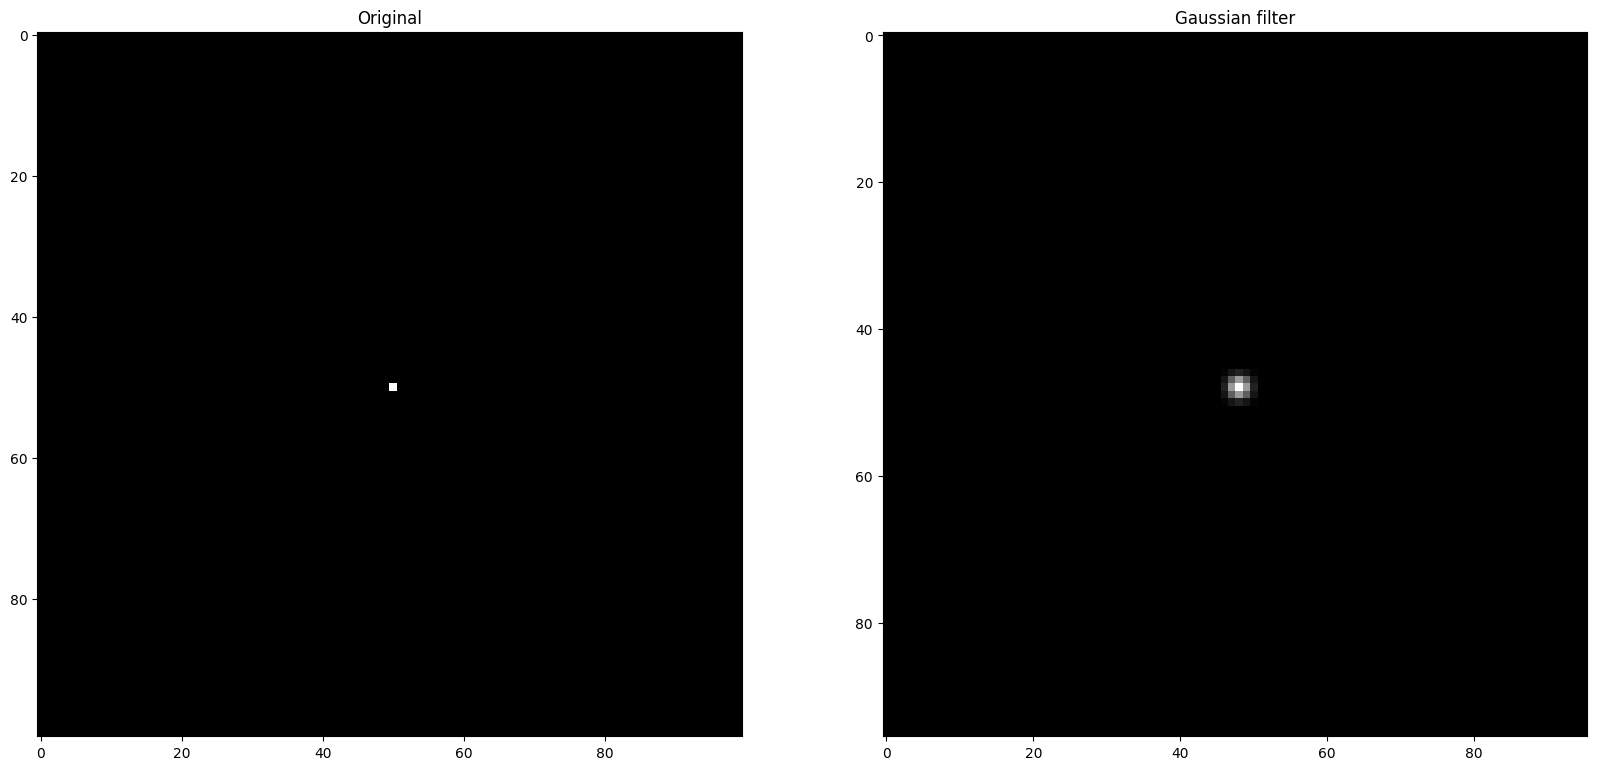

In [ ]:
gauss_kernel = convolution(image, gauss_filter)

fig, (original, gauss) = plt.subplots(1,2, figsize= (20,60))


original.imshow(image, cmap='gray')
original.set_title('Original')

gauss.imshow(gauss_kernel, cmap='gray')
gauss.set_title('Gaussian filter')

fig.show()

## Q-5
![imagem](https://www.oficinadanet.com.br/media/post/27837/750/ruido2.jpg)
>https://www.oficinadanet.com.br/media/post/27837/750/ruido2.jpg

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [ ]:
def noise_remove(image: np.ndarray, kernel_size) -> np.ndarray:
    m, n, channels  = image.shape
    result = np.zeros((m, n,channels))

    # Ajustar o tamanho do kernel para ser ímpar
    if kernel_size % 2 == 0:
      raise Exception('kernel_size should be a odd number')

    offset = kernel_size // 2

    for c in range(channels):  # Iterar sobre os canais de cor
        for i in range(offset, m - offset):
            for j in range(offset, n - offset):
                # Obter a vizinhança do pixel atual para cada canal
                neighbors = image[i - offset:i + offset + 1, j - offset:j + offset + 1, c]

                # Calcular a mediana para cada canal separadamente
                result[i, j, c] = np.median(neighbors)
    # for i in range(offset, m - offset):
    #     for j in range(offset, n - offset):
    #         for c in range(channels):
    #           neighbors = image[i - offset:i + offset + 1, j - offset:j + offset + 1, c]
    #           # Calcular a mediana para cada canal separadamente
    #           result[i, j, c] = np.median(neighbors)



    return np.array(result)



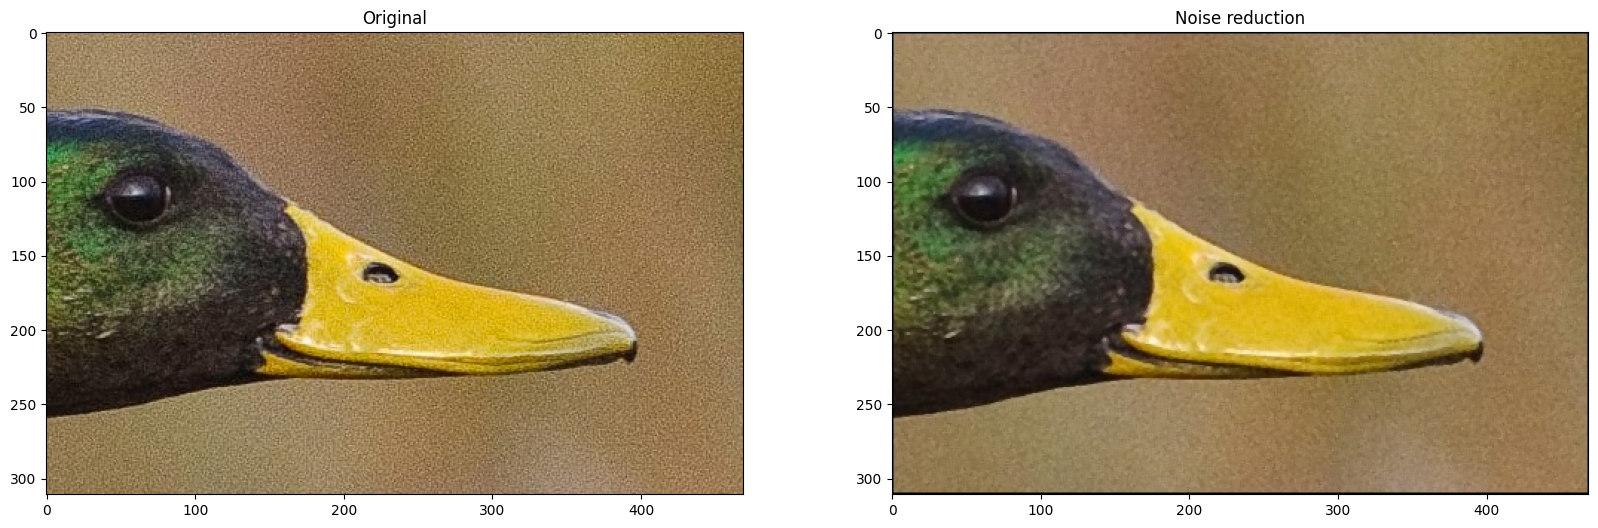

In [ ]:
img_noise = cv2.imread('./ruido2.jpg')

img_arr = np.array(img_noise)

img_removed_noise = noise_remove(img_arr,3)
cv2.imwrite('./sem_ruido.jpg',img_removed_noise)
img_removed_noise = cv2.imread('./sem_ruido.jpg')

fig, (original, noise_reduction) = plt.subplots(1,2,figsize = (20,6))

original.imshow(cv2.cvtColor(img_noise, cv2.COLOR_BGR2RGB), cmap='gray')
original.set_title('Original')

noise_reduction.imshow(cv2.cvtColor(img_removed_noise, cv2.COLOR_BGR2RGB),cmap='gray')
noise_reduction.set_title('Noise reduction')

fig.show()

## Q-6

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import urllib.request

In [3]:
urllib.request.urlretrieve("https://super.abril.com.br/wp-content/uploads/2021/09/pato-australiano_site.jpg?quality=90&strip=info&w=720&h=440&crop=1", "pato.jpg")

('pato.jpg', <http.client.HTTPMessage at 0x7db426f12b60>)

Text(0.5, 1.0, 'edges3')

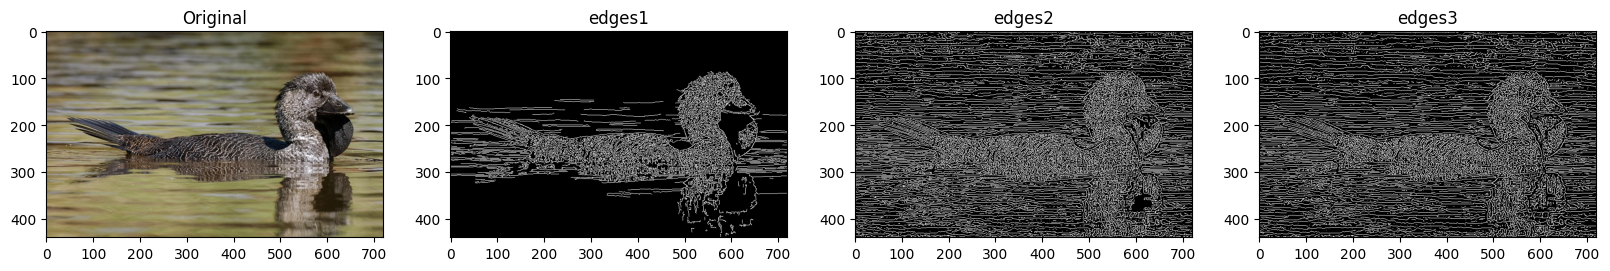

In [14]:
img = cv2.imread('./pato.jpg')
edges_img1 = cv2.Canny(img,100,200, apertureSize=3)
edges_img2 = cv2.Canny(img,100,200, apertureSize=5)
edges_img3 = cv2.Canny(img,100,200, apertureSize=7)

fig, (original, edges1, edges2, edges3) = plt.subplots(1,4, figsize=(20,6))

original.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
original.set_title('Original')

edges1.imshow(cv2.cvtColor(edges_img1, cv2.COLOR_BGR2RGB), cmap='gray')
edges1.set_title('edges1')

edges2.imshow(cv2.cvtColor(edges_img2, cv2.COLOR_BGR2RGB), cmap='gray')
edges2.set_title('edges2')

edges3.imshow(cv2.cvtColor(edges_img3, cv2.COLOR_BGR2RGB), cmap='gray')
edges3.set_title('edges3')


